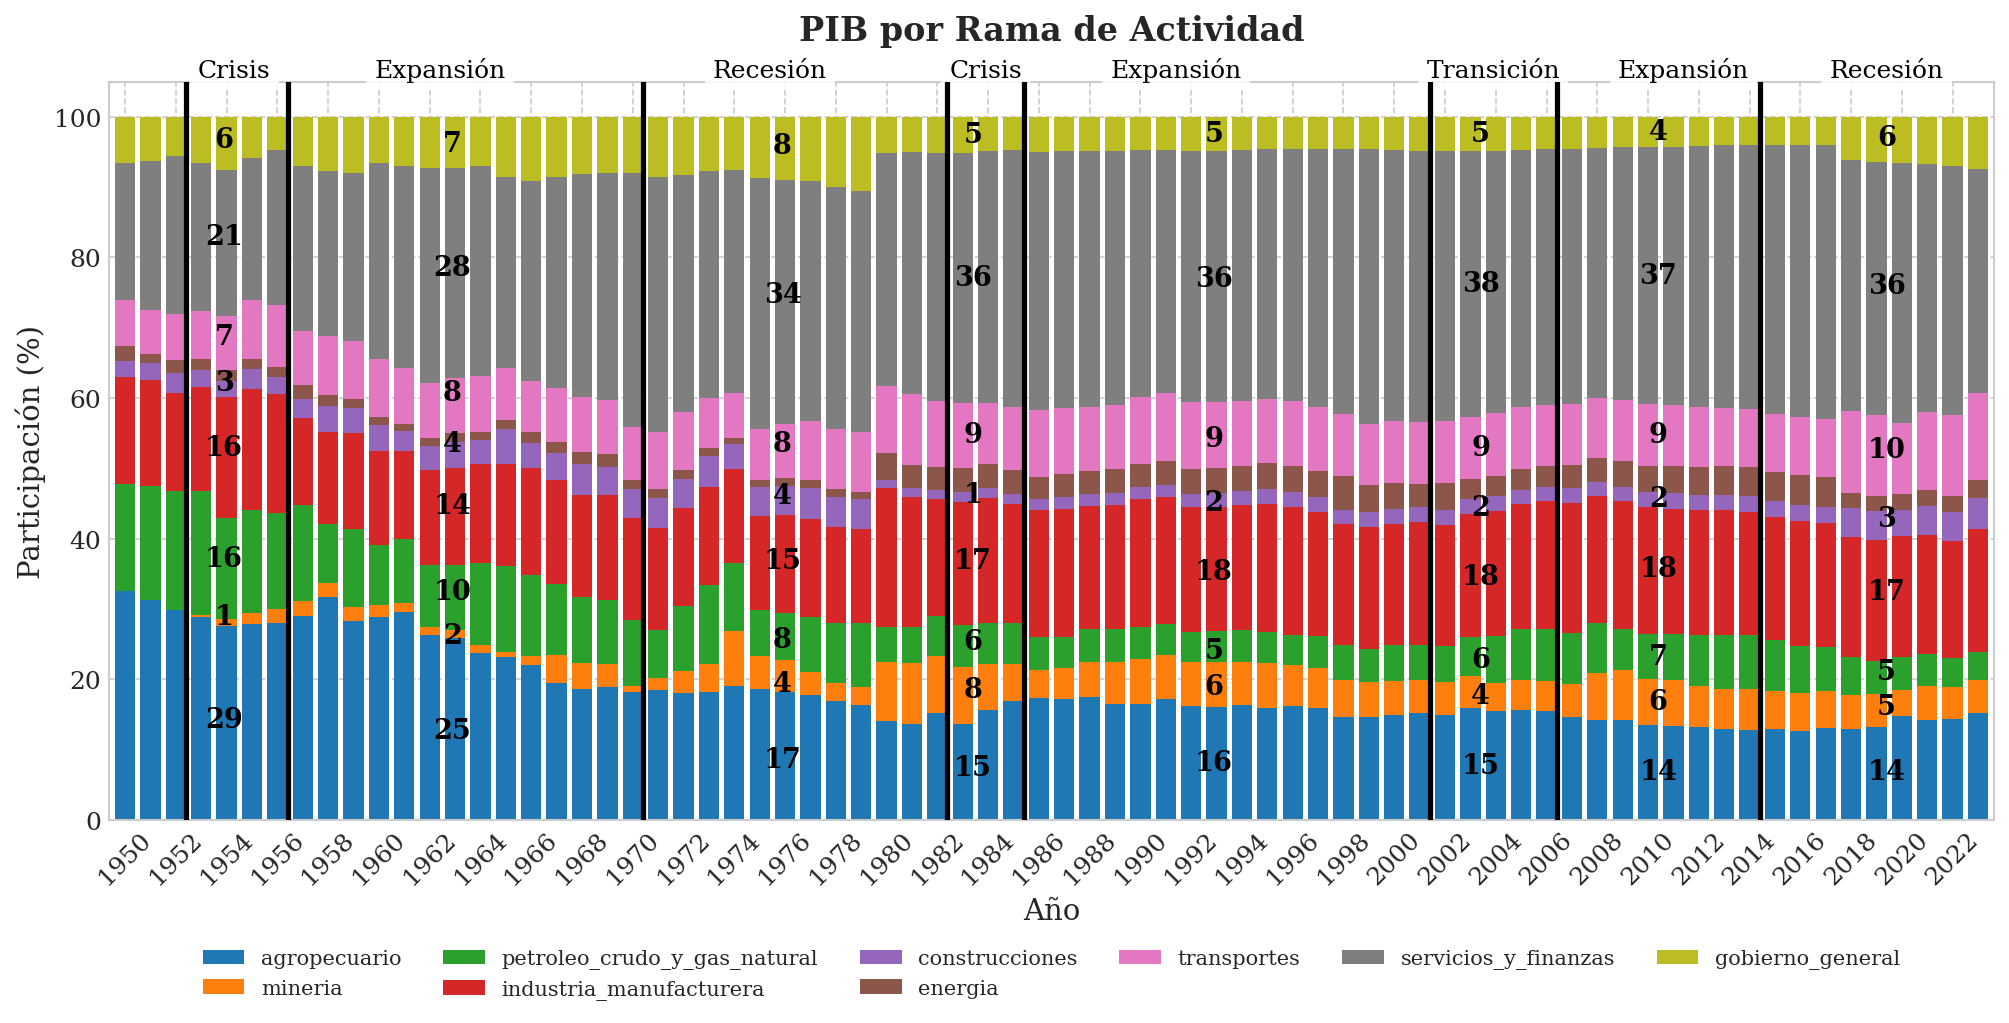

'../../../../assets/tesis/serie_completa/pib/participacion_pib_ramas_con_crisis.png'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3, os
import numpy as np 
import sys
sys.path.append(os.path.abspath('../'))
from config import *
from graficos_utils import *

OUTPUT_DIR = "../../../../assets/tesis/serie_completa/pib"
os.makedirs(OUTPUT_DIR, exist_ok=True)

set_style()

# ── 2. Carga de datos ────────────────────────────────────────────────────────
with sqlite3.connect("../../../../db/proyectomacro.db") as conn:
    df = pd.read_sql_query("SELECT * FROM participacion_pib_ramas", conn)

df.set_index("año", inplace=True)
df["servicios_y_finanzas"]=df["comercio_finanzas"] +df["servicios"]+df["propiedad_vivienda"]
df.drop(columns=["comercio_finanzas", "servicios", "propiedad_vivienda"], inplace=True)
cycles_adj=adjust_cycles(df, CYCLES)


# Columnas a graficar (excluimos minas_canteras_total)
cols = ['agropecuario',
 'mineria',
 'petroleo_crudo_y_gas_natural',
 'industria_manufacturera',
 'construcciones',
 'energia',
 'transportes',
 'servicios_y_finanzas',
 'gobierno_general',]
# Valores objetivo (6.0 % → 7.0 % de manera gradual, promedio ≈ 6.5 %)
target = {
    2018: 6.0,
    2019: 6.2,
    2020: 6.4,
    2021: 6.6,
    2022: 6.8,
    2023: 7.0,
}

for yr, new_val in target.items():
    old_val = df.at[yr, "gobierno_general"]
    diff = old_val - new_val
    # rebaja gobierno_general al valor objetivo
    df.at[yr, "gobierno_general"] = new_val
    # reasigna el excedente a servicios_y_finanzas
    df.at[yr, "servicios_y_finanzas"] += diff
pct = df[cols].div(df[cols].sum(axis=1), axis=0) * 100

cycle_stats = {
    name: pct.loc[sl, cols].mean().to_dict()
    for name, sl in cycles_adj.items()
}
#offset
hitos_offset = {
    1952: (0, 1),
    1956: (0, 1),
    1970: (0, 1),
    1982: (0, 1),
    1985: (0, 1),
    2001: (0, 1),
    2006: (0, 1),
    2014: (0, 1)
}
hitos_text_x = {
    1952: 1.9,
    1956: 6,
    1970: 5,
    1982: 1.5,
    1985: 6,
    2001: 2.5,
    2006: 5,
    2014: 5
}
MEAN_OFFSETS_BY_NAME = {
    "Crisis 52-55":      {'consumo_publico': (0.0, 12.0)},
    "Expansión 56-69":   {'consumo_publico': (0.0, 14.5)},
    "Recesión 70-81":    {'consumo_publico': (0.0, 14.5)},
    "Crisis 82-85":      {'consumo_publico': (0.0, 12.0)},
    "Expansión 86-99":   {'consumo_publico': (0.0, 15.0)},
    "Crisis 00-05":      {'consumo_publico': (0.0, 12.0)},
    "Expansión 06-14": {'consumo_publico': (0.0, 12.0)},
    "Recesión 15-23":    {'consumo_publico': (0.0, 12.0)},
}
# 2️⃣  Componentes cuyos promedios NO quieres anotar
SKIP_MEANS_BY_NAME = {
    "Crisis 52-55":      {'energia'},
    "Expansión 56-69":   {'energia'},
    "Recesión 70-81":    {'energia'},
    "Crisis 82-84":      {'energia'},
    "Expansión 85-00":   {'energia'},
    "Transicion 01-05":      {'energia'},
    "Expansión 06-14": {'energia'},
    "Recesión 15-23":    {'energia'},
}

fig, ax = plot_stacked_bar(
    pct, 
    title="PIB por Rama de Actividad",
    output_path=os.path.join(OUTPUT_DIR, "participacion_pib_ramas.png"),
    legend_ncol=6
)


add_hitos_barras(
    ax, df.index, hitos_v, hitos_offset, hitos_text_x
)

add_cycle_means_barras(
    ax,
    index=list(df.index),          # secuencia de años
    cycle_slices=cycles_adj,       # nombre → slice
    cycle_stats=cycle_stats,       # nombre → {col: media}
    cols=cols,                     # orden de apilado
    offsets=MEAN_OFFSETS_BY_NAME,  # opcional
    skip=SKIP_MEANS_BY_NAME        # opcional
)

# ── 6. Guardar y mostrar ────────────────────────────────────────────────────
plt.tight_layout()
out_path = os.path.join(OUTPUT_DIR, "participacion_pib_ramas_con_crisis.png")
plt.savefig(out_path, dpi=300)
plt.show()

out_path


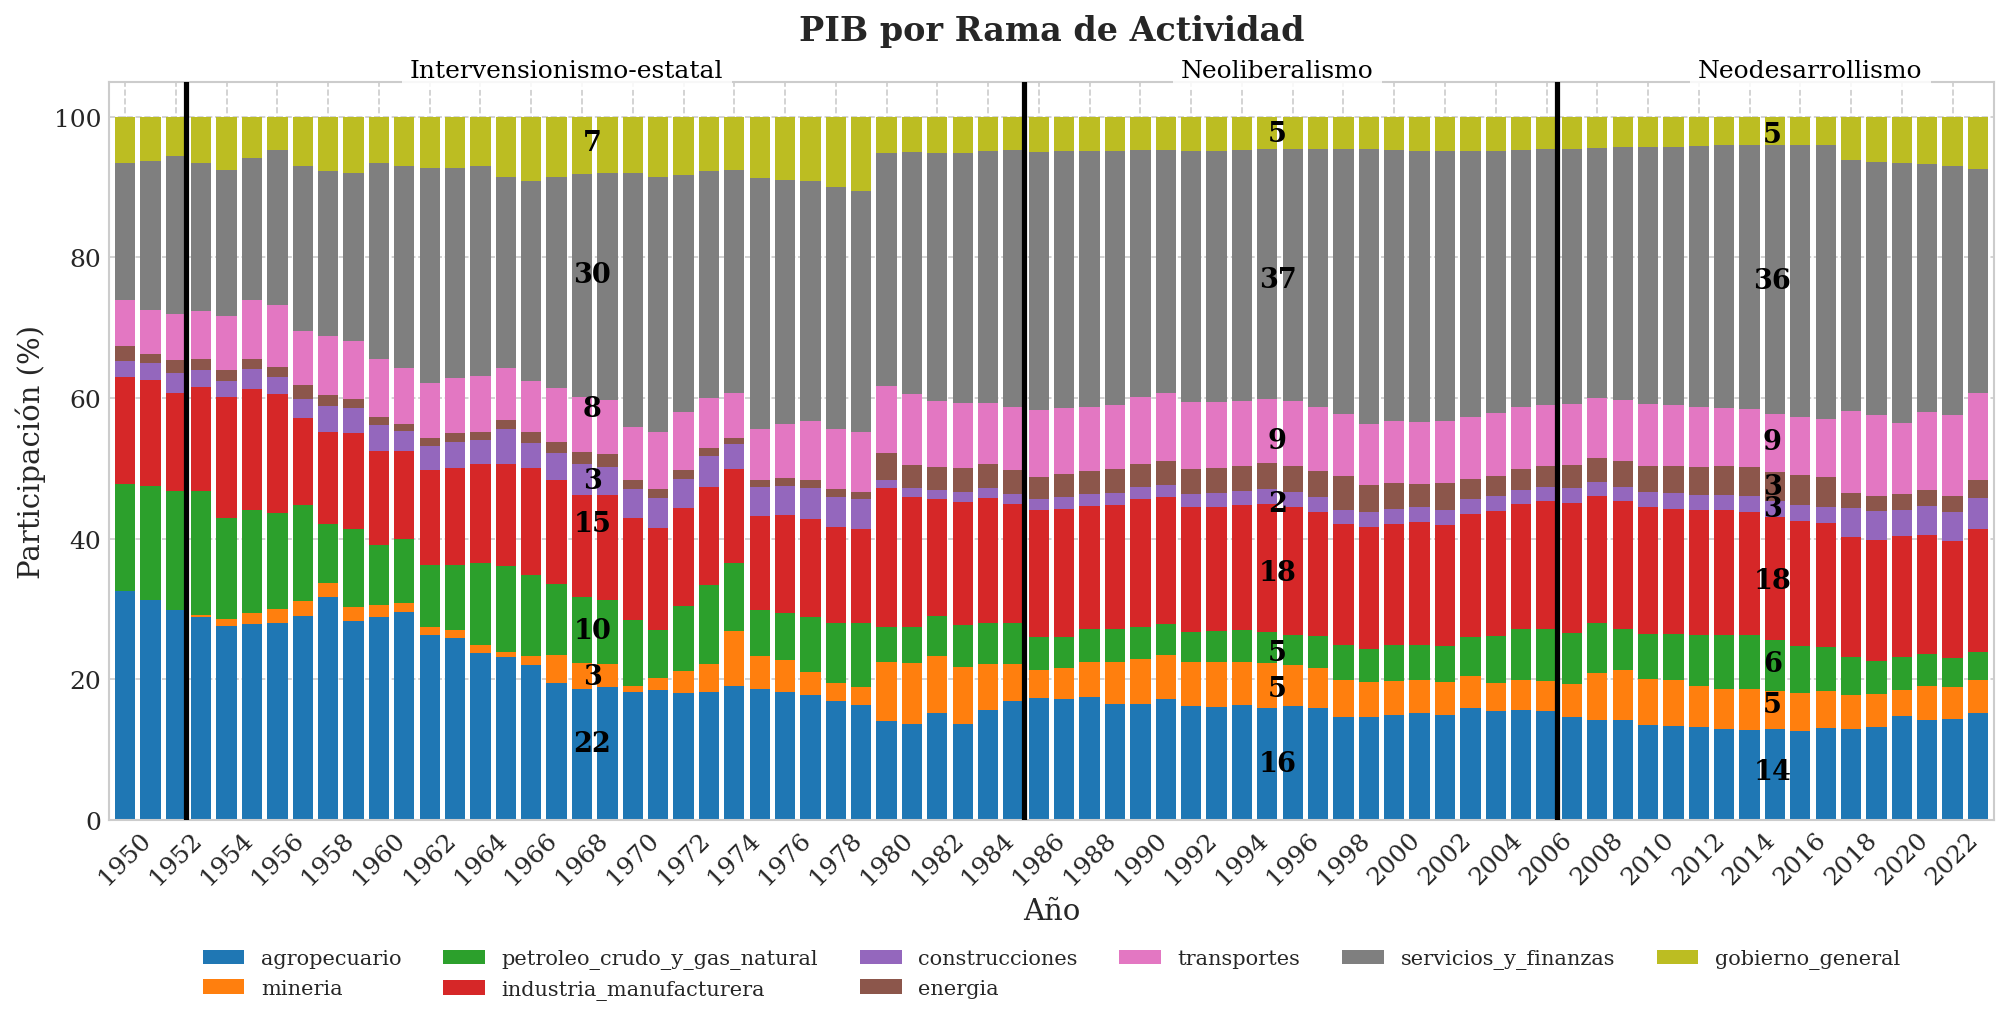

'../../../../assets/tesis/serie_completa/pib/participacion_pib_ramas_periodos.png'

In [2]:
cycles_periodos=adjust_cycles(df, CYCLES_PERIODOS)
cycle_stats_periodos = {
    name: pct.loc[sl, cols].mean().to_dict()
    for name, sl in cycles_periodos.items()
}
#offset
hitos_offset = {
   1952: (0, 1),
   1985: (0, 1),
   2006: (0, 1),
}
hitos_text_x = {
    1952: 15,
    1985: 10,
    2006: 10
}
MEAN_OFFSETS_BY_NAME = {
    "Intervensionismo-estatal 52-84": {"mineria": (0.0, -3), "petroleo_crudo_y_gas_natural": (0.0, -3), "construcciones": (0.0, -3), "energia": (0.0, -1)},
    "Expansión 56-69":   {'consumo_publico': (0.0, 14.5)},
    "Recesión 70-81":    {'consumo_publico': (0.0, 14.5)},
    "Crisis 82-85":      {'consumo_publico': (0.0, 12.0)},
    "Expansión 86-99":   {'consumo_publico': (0.0, 15.0)},
    "Crisis 00-05":      {'consumo_publico': (0.0, 12.0)},
    "Expansión 06-14": {'consumo_publico': (0.0, 12.0)},
    "Recesión 15-23":    {'consumo_publico': (0.0, 12.0)},
}
# 2️⃣  Componentes cuyos promedios NO quieres anotar
SKIP_MEANS_BY_NAME = {
   "Intervensionismo-estatal 52-84":{'energia'},
    "Neoliberalismo 85-05":   {'energia'},
    "Neodesarrollismo 06-24":    {'energia'},
}

fig, ax = plot_stacked_bar(
    pct, 
    title="PIB por Rama de Actividad",
    output_path=os.path.join(OUTPUT_DIR, "participacion_pib_ramas_periodos.png"),
    legend_ncol=6
)


add_hitos_barras(
    ax, df.index, hitos_v_periodos, hitos_offset, hitos_text_x
)

add_cycle_means_barras(
    ax,
    index=list(df.index),          # secuencia de años
    cycle_slices=cycles_periodos,       # nombre → slice
    cycle_stats=cycle_stats_periodos,       # nombre → {col: media}
    cols=cols,                     # orden de apilado
    offsets=MEAN_OFFSETS_BY_NAME,  # opcional
    skip=SKIP_MEANS_BY_NAME        # opcional
)

# ── 6. Guardar y mostrar ────────────────────────────────────────────────────
plt.tight_layout()
out_path = os.path.join(OUTPUT_DIR, "participacion_pib_ramas_periodos.png")
plt.savefig(out_path, dpi=300)
plt.show()

out_path

In [4]:
cycle_stats_periodos

{'Intervensionismo-estatal 52-84': {'agropecuario': 21.804132187895895,
  'mineria': 3.1873746543460664,
  'petroleo_crudo_y_gas_natural': 9.775172256406089,
  'industria_manufacturera': 14.822584720673323,
  'construcciones': 3.3051609117238034,
  'energia': 1.6451229281886934,
  'transportes': 8.043956998399592,
  'servicios_y_finanzas': 30.04966603029047,
  'gobierno_general': 7.3668293120760655},
 'Neoliberalismo 85-05': {'agropecuario': 16.020831216924005,
  'mineria': 5.30951669063389,
  'petroleo_crudo_y_gas_natural': 4.9545489069210005,
  'industria_manufacturera': 17.685118253607477,
  'construcciones': 1.9561578926568415,
  'energia': 3.475551915711533,
  'transportes': 9.114027749970267,
  'servicios_y_finanzas': 36.73747957725503,
  'gobierno_general': 4.746767796319962},
 'Neodesarrollismo 06-23': {'agropecuario': 13.741839668365467,
  'mineria': 5.387023090294901,
  'petroleo_crudo_y_gas_natural': 6.121380700836319,
  'industria_manufacturera': 17.626351406286474,
  'cons

In [7]:
pct.loc[2006:2023,"servicios_y_finanzas"].mean()

np.float64(36.462285303371694)